# Student Performance Indikator

## 1. Problem Statement

Memahami bagaimana performa murid(nilai ujian ) dapat dipengeruhi melalui beberapa variabel seperti : 

- Ggender 
- Etnis 
- Tingkat pendidikan orang tua
- Nutrisi
- Persiapan ujian  

## 2. Data collection

Data ini didapatkan melalui kaggle dengan jumlah kolom 8 dan 1000 baris

- source (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


**Import the CSV Data as Pandas DataFrame**

In [5]:
df = pd.read_csv('data/stud.csv')
print("Data Shape : ",df.shape)
df.head()

Data Shape :  (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3 Data Quality Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Insight**

There are no missing values in the data set

### 3.2 Check Duplicate Data

In [9]:
df.duplicated().sum()

np.int64(0)

**Insight**

There are no duplicates values in the data set

### 3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

- Dari deskripsi data numerik di atas, semua nilai rata-rata data mirip satu sama lain yaitu antara (66 - 68,05)
- Semua standar deviasi juga dekat - antara 14,6 dan 15,19;
- Meskipun terdaoat nilai minimal 0 pada "math_score", namun nilai minimal pada "writing_score" jauh lebih tinggi yaitu 10 dan untuk reading_score lebih tinggi lagi yaitu 17

### 3.6 Exploring Data

In [17]:
print("kategori pada variabel 'gender' :\t",end=" " )
print(df['gender'].unique())

print("kategori pada variabel 'race_ethnicity' :\t",end=" ")
print(df['race_ethnicity'].unique())

print("kategori pada variabel 'parental level of education' :\t",end=" " )
print(df['parental_level_of_education'].unique())

print("kategori pada variabel 'lunch' : \t",end=" " )
print(df['lunch'].unique())

print("kategori pada variabel 'test preparation course' : \t",end=" " )
print(df['test_preparation_course'].unique())

kategori pada variabel 'gender' :	 ['female' 'male']
kategori pada variabel 'race_ethnicity' :	 ['group B' 'group C' 'group A' 'group D' 'group E']
kategori pada variabel 'parental level of education' :	 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
kategori pada variabel 'lunch' : 	 ['standard' 'free/reduced']
kategori pada variabel 'test preparation course' : 	 ['none' 'completed']


In [19]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('terdapat {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nterdapat {} categorical features : {}'.format(len(categorical_features), categorical_features))

terdapat 3 numerical features : ['math_score', 'reading_score', 'writing_score']

terdapat 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Membuat kolom "Total Score" & "Average"

In [20]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Jumlah siswa dengan nilai sempurna pada ujian Maths : {math_full}')
print(f'Jumlah siswa dengan nilai sempurna pada ujian Writing : {writing_full}')
print(f'Jumlah siswa dengan nilai sempurna pada ujian Reading : {reading_full}')

Jumlah siswa dengan nilai sempurna pada ujian Maths : 7
Jumlah siswa dengan nilai sempurna pada ujian Writing : 14
Jumlah siswa dengan nilai sempurna pada ujian Reading : 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Jumlah siswa dengan nilai skurang dari 20 pada ujian Maths: {math_less_20}')
print(f'Jumlah siswa dengan nilai skurang dari 20 pada ujian Writing: {writing_less_20}')
print(f'Jumlah siswa dengan nilai skurang dari 20 pada ujian Reading: {reading_less_20}')

Jumlah siswa dengan nilai skurang dari 20 pada ujian Maths: 4
Jumlah siswa dengan nilai skurang dari 20 pada ujian Writing: 3
Jumlah siswa dengan nilai skurang dari 20 pada ujian Reading: 1


**Insight**

- Dari informasi di atas kita mengetahui bahwa performa terburuk lebih banyak pada subjek "math",
- Sedangkan yang terbaik pada subjek "reading"

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

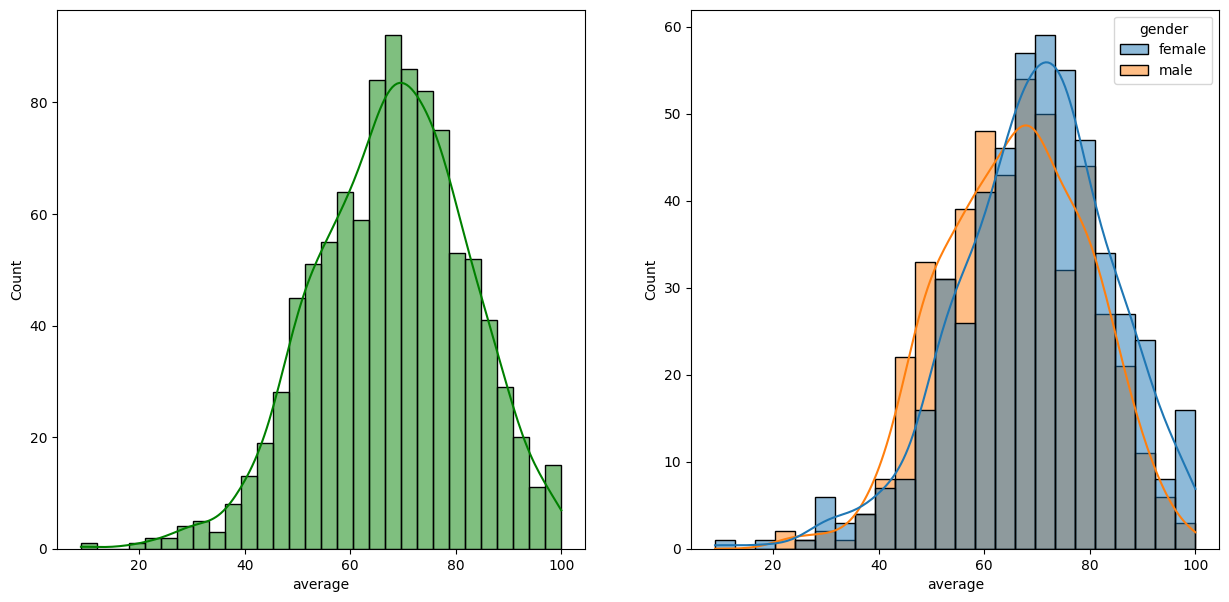

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

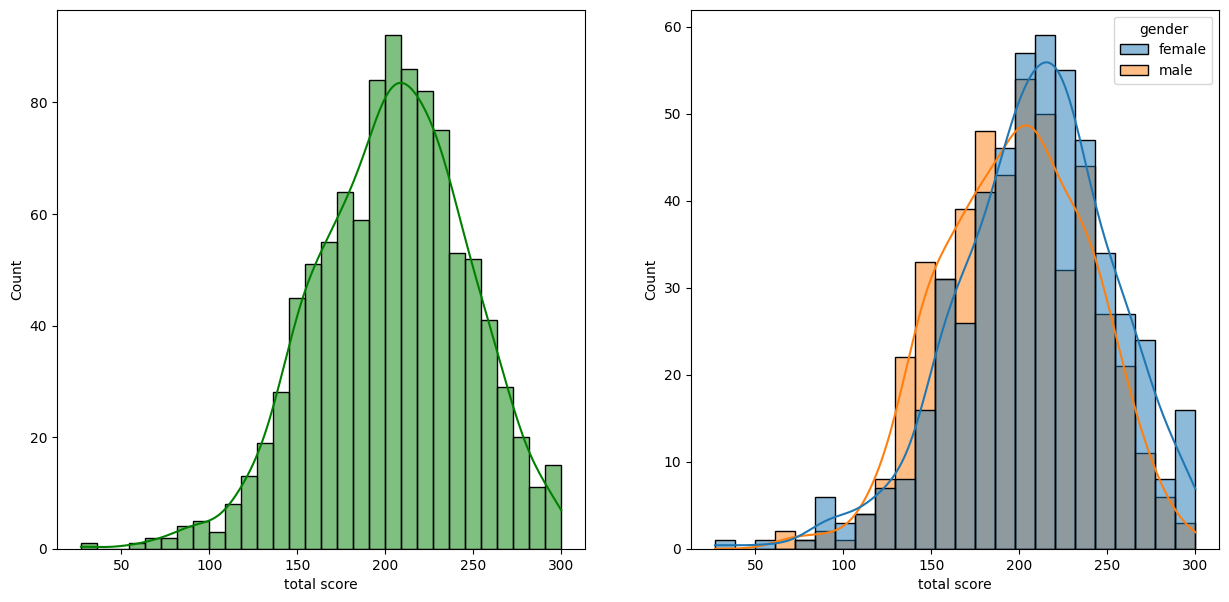

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

**Insight**

Performa murid perempuan cenderung lebih baik daripada laki-laki

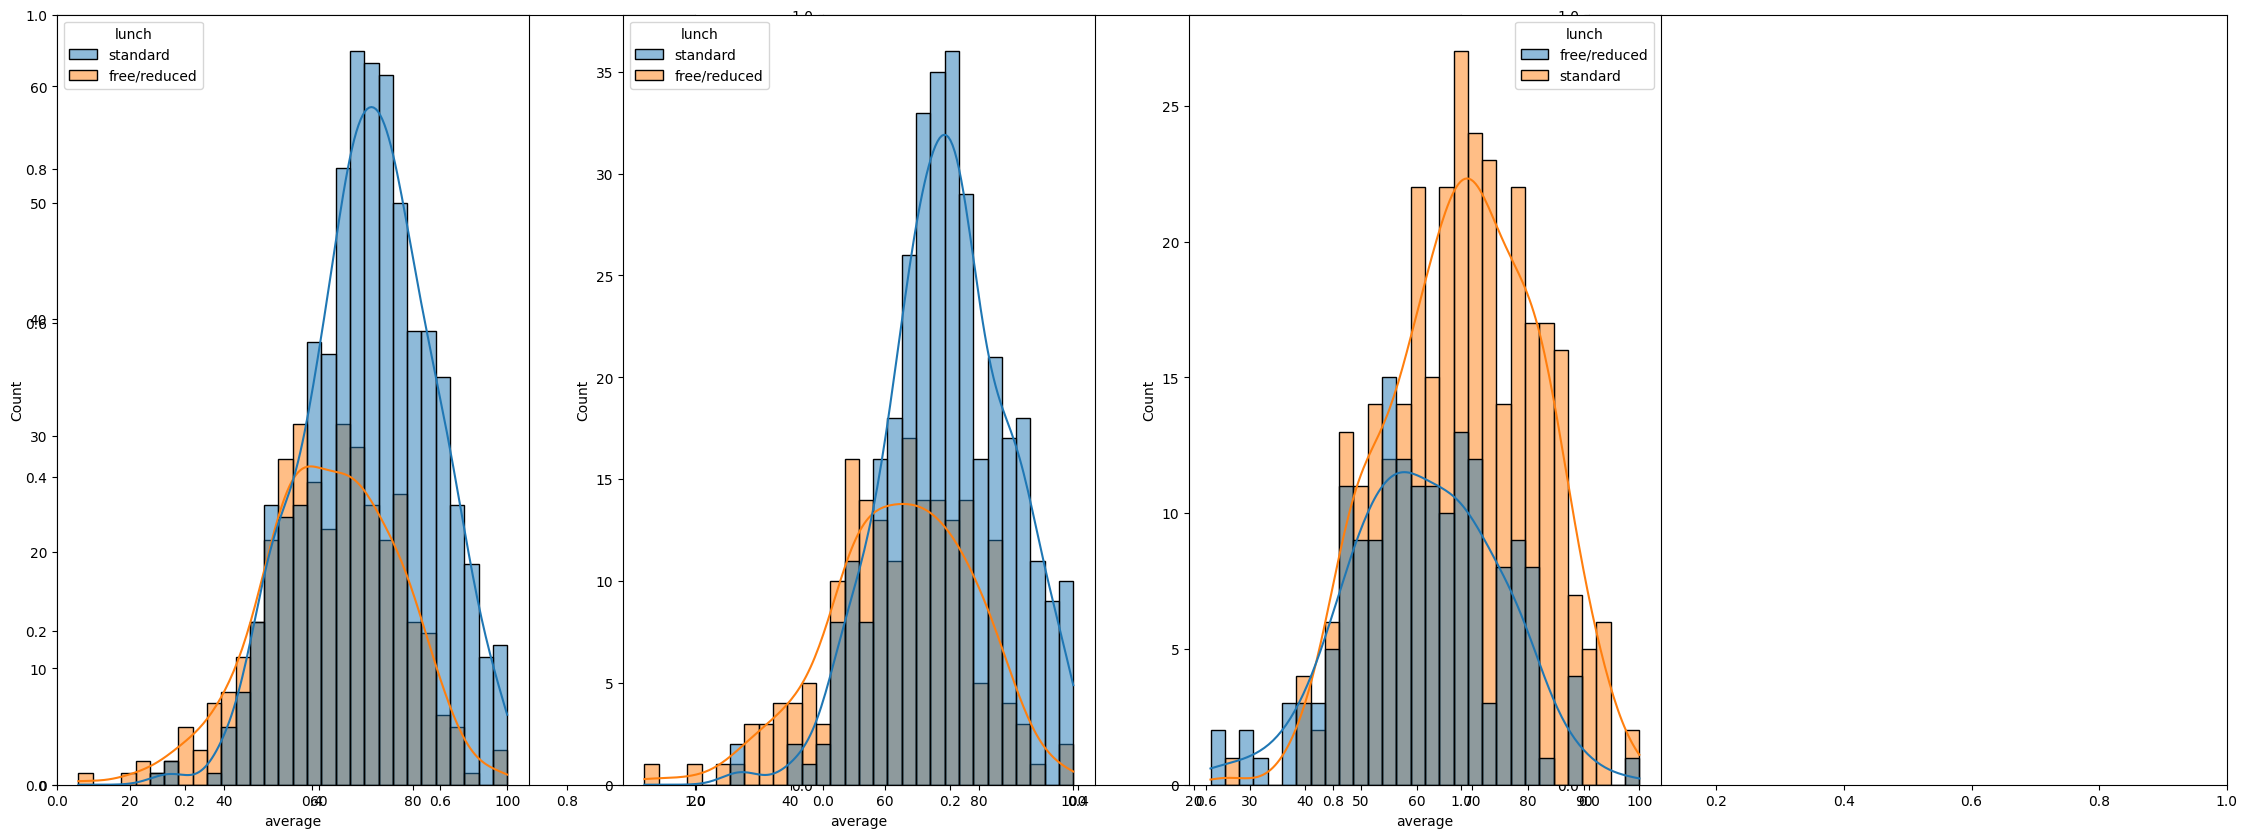

In [51]:
plt.subplots(1,3,figsize=(28,10))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch', bins=30)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', bins=30)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', bins=30)
plt.show()

**Insights**

standard Makan siang membantu meningkatkan performa murid baik laki-laki ataupun perrempuan dalam skor ujian

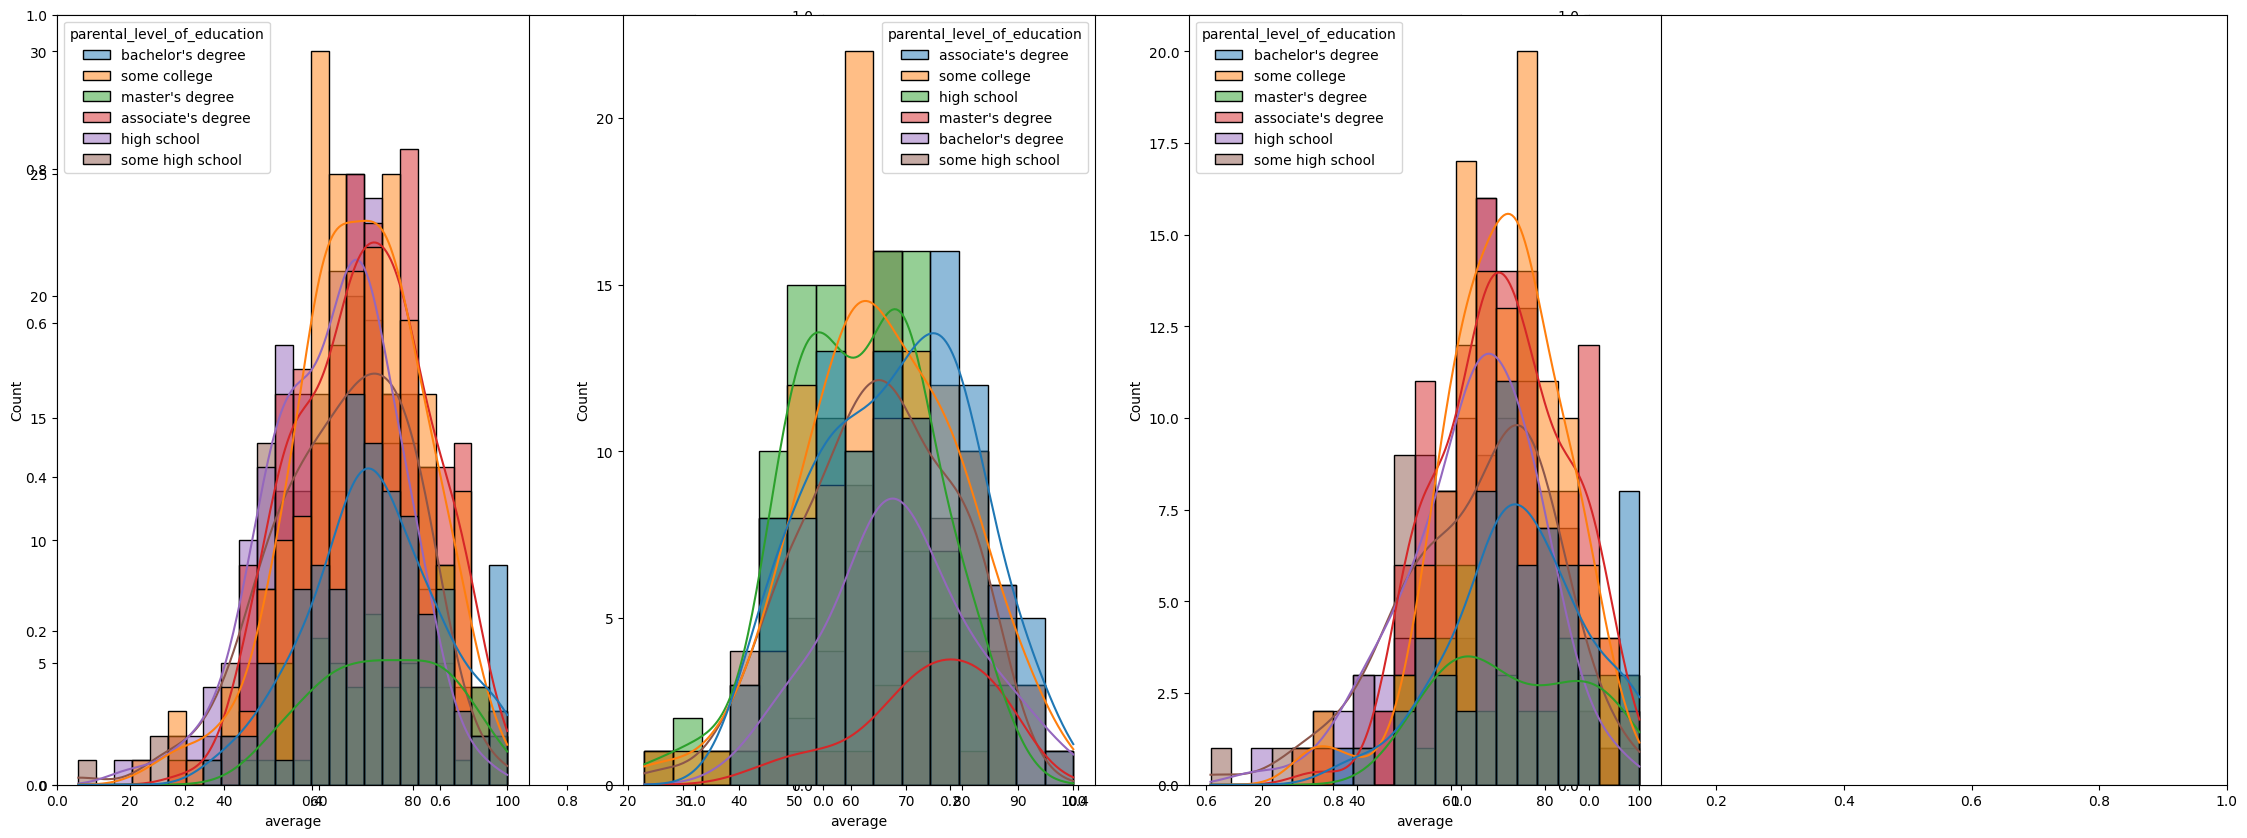

In [58]:
plt.subplots(1,3,figsize=(28,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

**Insights**

- Secara umum pendidikan orang tua tidak membantu siswa berprestasi dalam ujian.
- Plot ke-2 menunjukkan bahwa orang tua yang berpendidikan associate atau master, anak laki-lakinya cenderung berprestasi baik dalam ujian.
- Plot ke 3 terlihat tidak ada pengaruh pendidikan orang tua terhadap siswi (peremouan).

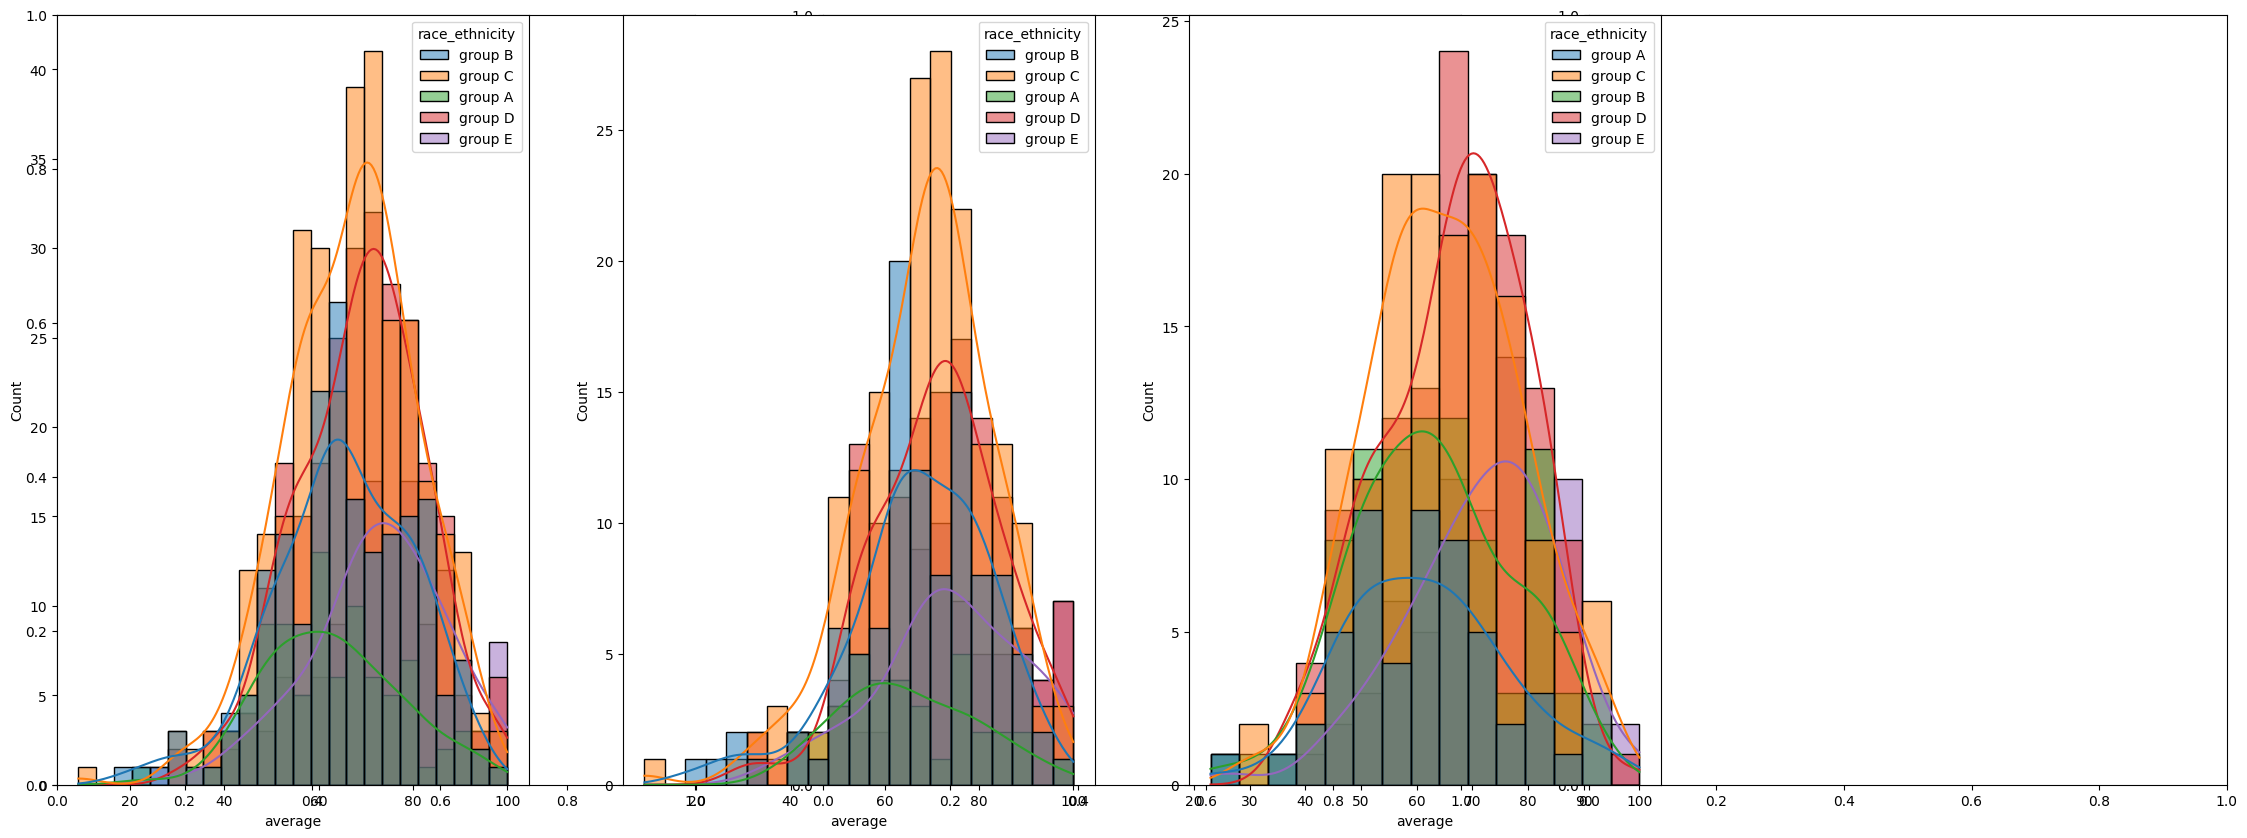

In [66]:
plt.subplots(1,3,figsize=(28,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

**Insights**

- Siswa kelompok A dan kelompok B cenderung mempunyai nilai ujian yang buruk.
- Siswa kelompok A dan kelompok B cenderung mendapat nilai buruk dalam ujian terlepas dari apakah mereka laki-laki atau perempuan

### 4.2 Maximumum score of students in all three subjects

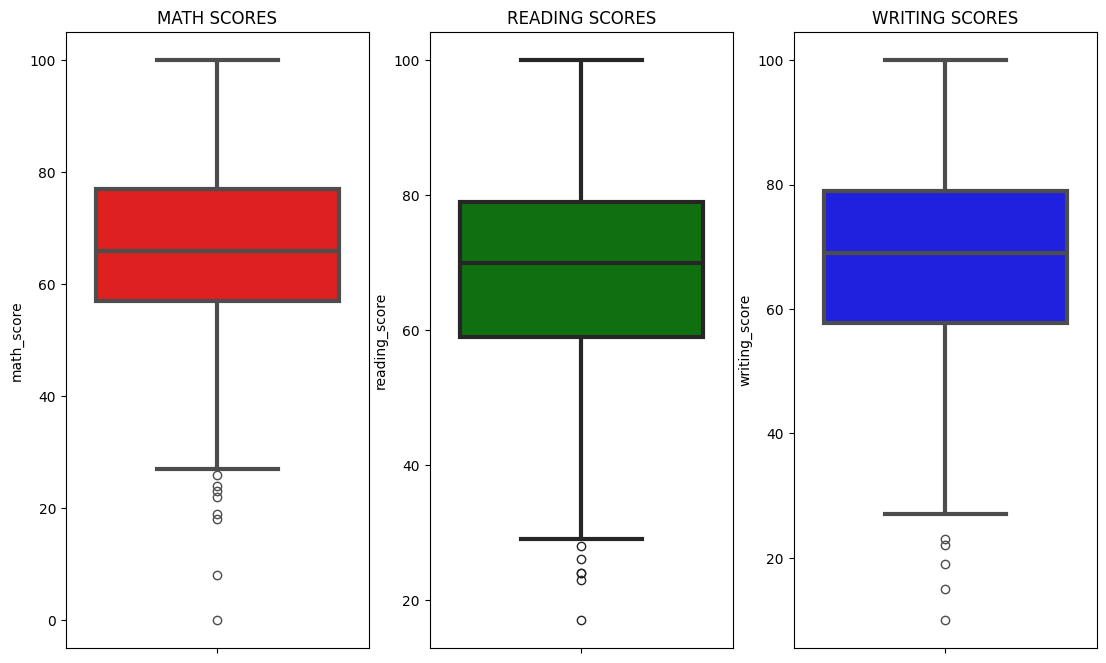

In [68]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insight**

- Dari ketiga plot di atas terlihat jelas bahwa sebagian besar siswa mendapat nilai antara 60-80 dalam seluruh subjek tes

### 4.3 Multivariate analysis using pieplot

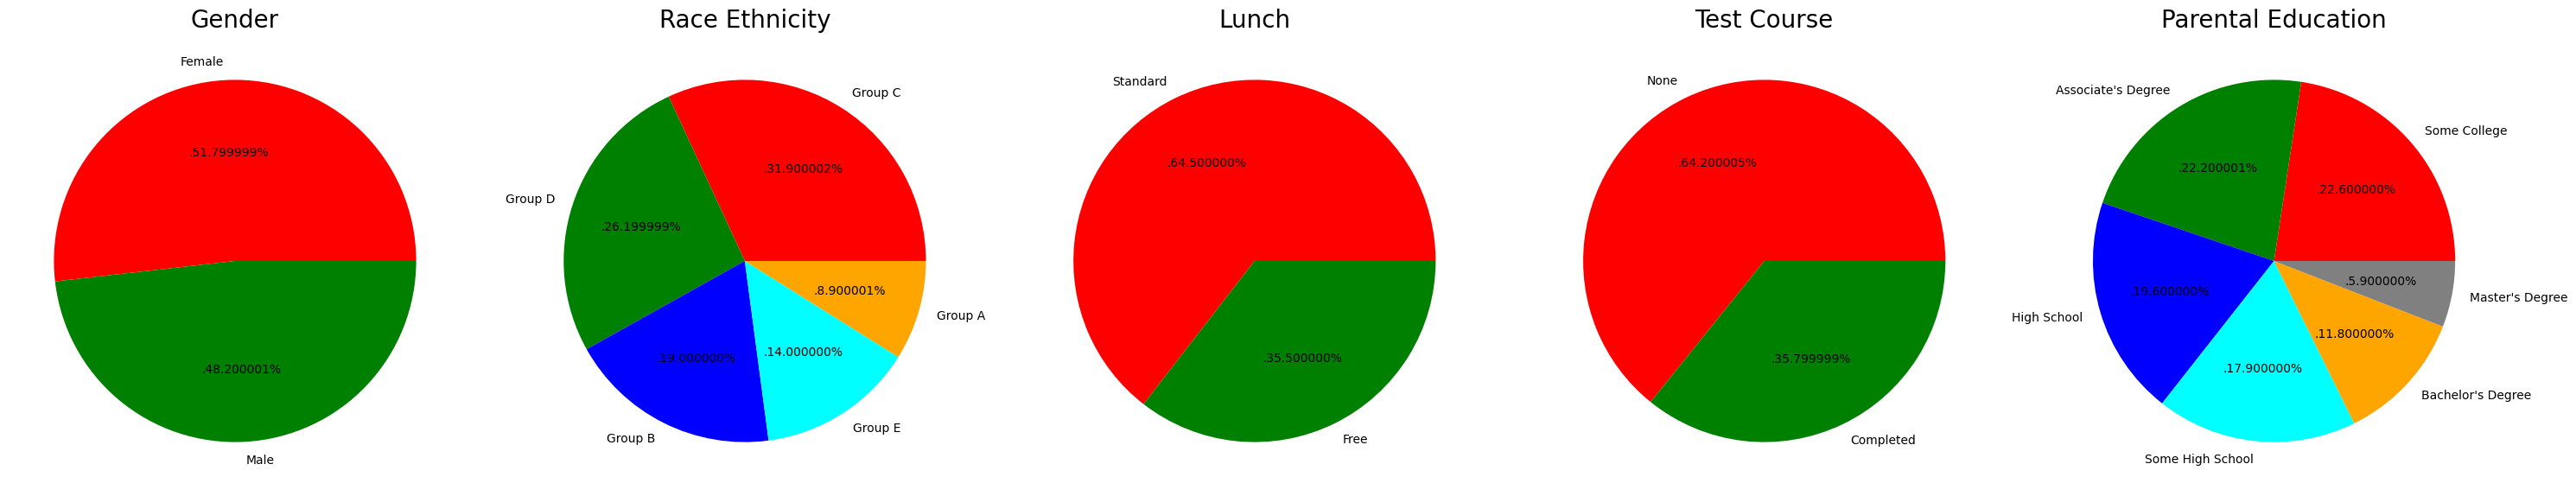

In [70]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insight**

- Jumlah siswa laki-laki dan perempuan hampir seimbang
- Jumlah siswa terbanyak terdapat pada Grup C
- Jumlah siswa yang mendapat standar makan siang lebih banyak
- Jumlah siswa yang belum mendaftar pada kursus persiapan ujian apa pun lebih besar
- Jumlah siswa yang pendidikan orang tuanya adalah "Some College" lebih banyak, kemudian diikuti oleh "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

- Bagaimana distribusi data pada kolom gender?

**UNIVARIATE ANALYSIS (bagaimana distribusi pada gender? )**

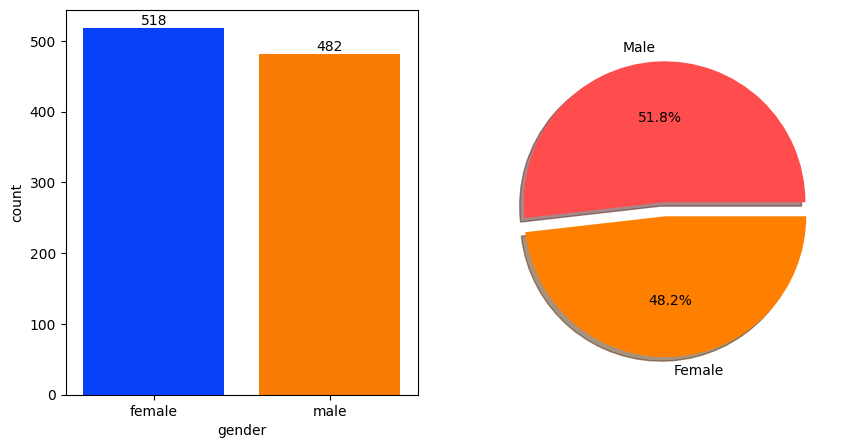

In [72]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insight**

- distribusi data Gender memiliki data yang seimbang dengan siswa perempuan sebanyak 518 (48%) dan siswa laki-laki sebanyak 482 (52%)

#### 4.4.2 Checking Outliers

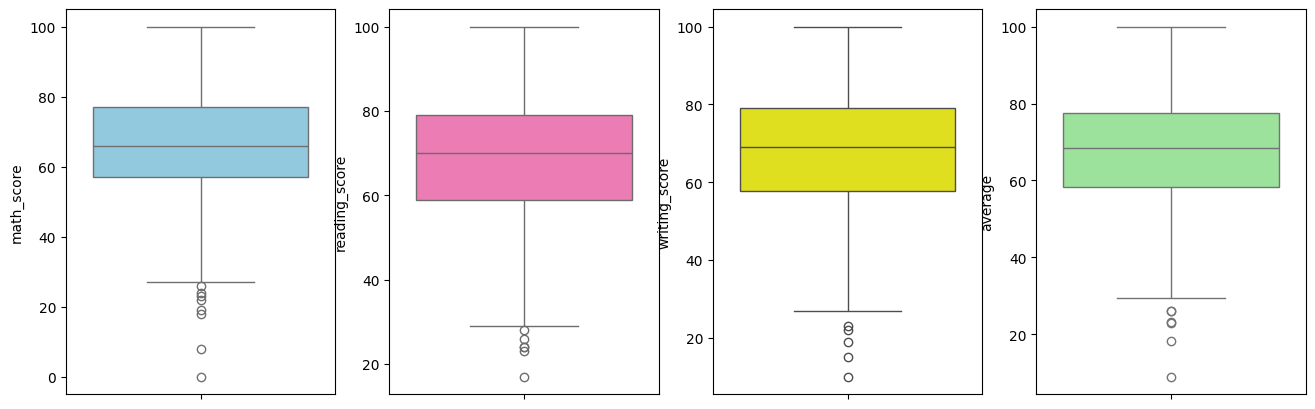

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.3 MUTIVARIATE ANALYSIS USING PAIRPLOT

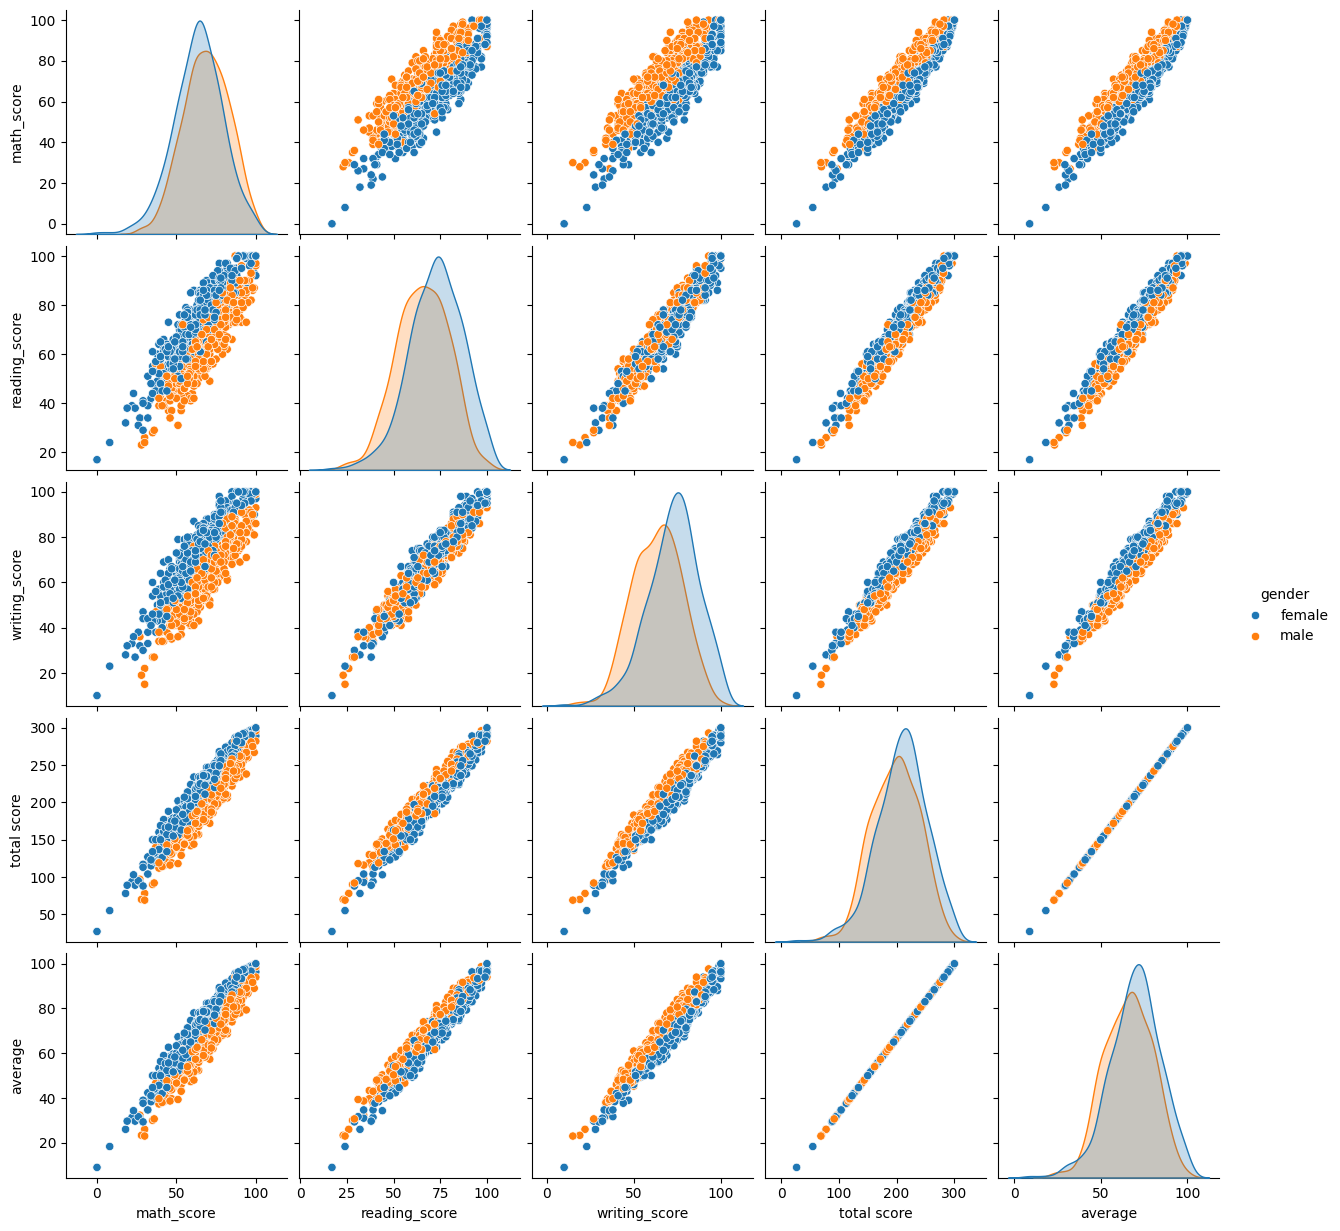

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insight**

- Dari plot di atas terlihat jelas bahwa semua skor meningkat secara linier satu sama lain.

## 5. Conclusions

- Prestasi Siswa berkaitan dengan makan siang, etnis, tingkat pendidikan orang tua
- Siswi memimpin dalam persentase kelulusan
- Kinerja Siswa tidak banyak berhubungan dengan mata kuliah persiapan ujian
- Melakukan Kursus persiapan memiliki dampak baik bagi prestasi siswa